<a href="https://colab.research.google.com/github/shyamsgadekar/EDA_HOTEL_BOOKING_ANALYSIS/blob/main/Hotel_Booking_Analysis_SHYAM_GADEKAR_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [42]:
# Import Python libraries.
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
#Linked our Googlecolab notebook to Google Drive.
from google.colab import drive
drive.mount('//content//drive')

Drive already mounted at //content//drive; to attempt to forcibly remount, call drive.mount("//content//drive", force_remount=True).


In [45]:
#Data from Hotel Booking.csv file from Google Drive has been assigned to data frame named df_hotel. 
df_hotel=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECT/1.1_EDA_CAPSTONE_SHYAM_GADEKAR/Hotel Bookings.csv')
df1=df_hotel.copy()

# ***Understand dataset input***

* Find out the total columns and rows of dataset
* Find the data type of each column.
* Find the continuous and categorical data
* Find individual distribution for some of the columns
* Also check the correlation between dependent columns

In [46]:
#Just take a look at the df_hotel file data to find out the total columns and rows of dataset.
df_hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [47]:
#Get the basic info of each columns with not null rows and datatype which will give idea about the data type of each column.
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [48]:
#Find the continuous and categorical data


# Now just take a look at the unique values of each column in the df_hotel file.


In [49]:
print(df_hotel['hotel'].unique())

['Resort Hotel' 'City Hotel']


There are two types of hotels
* Resort Hotel 
* City hotel

In [50]:
print(df_hotel['is_canceled'].unique())

[0 1]


This column predicts
* Booking cancelled = 1  
* Booking not cancelled = 0

In [51]:
print(df_hotel['lead_time'].unique())

[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193 235 194 261 260 216
 169 209 238 215 141 189 187 223 284 214 202 211 16

* The column **Lead Time** predicts the time difference between guest books their room and the time they are scheduled to arrive at the hotel.

In [52]:
print(df_hotel['arrival_date_year'].unique())

[2015 2016 2017]


* **arrival_date_year** is Year of arrival of the guest.

In [53]:
print(df_hotel['arrival_date_month'].unique())

['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']


* **arrival_date_month** is Months of arrival of the guest.

In [54]:
print(df_hotel['arrival_date_week_number'].unique())

[27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21
 22 23 24 25 26]


* **arrival_date_week_number** is weak of arrival of the guest.

In [55]:
print(df_hotel['meal'].unique())

['BB' 'FB' 'HB' 'SC' 'Undefined']


**Meal type**.

* **BB** : Bed and Breakfast
* **HB** : Half Board (Breakfast and Dinner normally)

* **FB** : Full Board (Beakfast, Lunch and Dinner)
* **SC** : Self-catering
* **Undefined** : Rooms only packages without meals.



In [56]:
print(df_hotel['market_segment'].unique())

['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']


**Market segment** 
This provides source of information through which customer booked
* **TA** - "Travel Agent"
* **TO** - "Tour operators"
* **Direct** -"Direct booking

In [57]:
print(df_hotel['distribution_channel'].unique())


['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']


**Distribution Channel** 
* We provides source of information through which customer booked
* **TA/TO** - "Travel Agent"/"Tour operators"
* **Direct** -"Direct booking"
* **Corporate**- "Corporate booking"

In [58]:
print(df_hotel['is_repeated_guest'].unique())

[0 1]


**Guests are new or old.**
* **1**  -> old guest
* **0** ->  New  guest

In [59]:
print(df_hotel['reserved_room_type'].unique())

['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']


In [60]:
print(df_hotel['assigned_room_type'].unique())

['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']


In [61]:
print(df_hotel['booking_changes'].unique())

[ 3  4  0  1  2  5 17  6  8  7 10 16  9 13 12 20 14 15 11 21 18]


In [62]:
print(df_hotel['deposit_type'].unique())

['No Deposit' 'Refundable' 'Non Refund']


In [63]:
print(df_hotel['company'].unique())

[ nan 110. 113. 270. 178. 240. 154. 144. 307. 268.  59. 204. 312. 318.
  94. 174. 274. 195. 223. 317. 281. 118.  53. 286.  12.  47. 324. 342.
 373. 371. 383.  86.  82. 218.  88.  31. 397. 392. 405. 331. 367.  20.
  83. 416.  51. 395. 102.  34.  84. 360. 394. 457. 382. 461. 478. 386.
 112. 486. 421.   9. 308. 135. 224. 504. 269. 356. 498. 390. 513. 203.
 263. 477. 521. 169. 515. 445. 337. 251. 428. 292. 388. 130. 250. 355.
 254. 543. 531. 528.  62. 120.  42.  81. 116. 530. 103.  39.  16.  92.
  61. 501. 165. 291. 290.  43. 325. 192. 108. 200. 465. 287. 297. 490.
 482. 207. 282. 437. 225. 329. 272.  28.  77. 338.  72. 246. 319. 146.
 159. 380. 323. 511. 407. 278.  80. 403. 399.  14. 137. 343. 346. 347.
 349. 289. 351. 353.  54.  99. 358. 361. 362. 366. 372. 365. 277. 109.
 377. 379.  22. 378. 330. 364. 401. 232. 255. 384. 167. 212. 514. 391.
 400. 376. 402. 396. 302. 398.   6. 370. 369. 409. 168. 104. 408. 413.
 148.  10. 333. 419. 415. 424. 425. 423. 422. 435. 439. 442. 448. 443.
 454. 

In [64]:
print(df_hotel['agent'].unique())

[ nan 304. 240. 303.  15. 241.   8. 250. 115.   5. 175. 134. 156. 243.
 242.   3. 105.  40. 147. 306. 184.  96.   2. 127.  95. 146.   9. 177.
   6. 143. 244. 149. 167. 300. 171. 305.  67. 196. 152. 142. 261. 104.
  36.  26.  29. 258. 110.  71. 181.  88. 251. 275.  69. 248. 208. 256.
 314. 126. 281. 273. 253. 185. 330. 334. 328. 326. 321. 324. 313.  38.
 155.  68. 335. 308. 332.  94. 348. 310. 339. 375.  66. 327. 387. 298.
  91. 245. 385. 257. 393. 168. 405. 249. 315.  75. 128. 307.  11. 436.
   1. 201. 183. 223. 368. 336. 291. 464. 411. 481.  10. 154. 468. 410.
 390. 440. 495. 492. 493. 434.  57. 531. 420. 483. 526. 472. 429.  16.
 446.  34.  78. 139. 252. 270.  47. 114. 301. 193. 182. 135. 350. 195.
 352. 355. 159. 363. 384. 360. 331. 367.  64. 406. 163. 414. 333. 427.
 431. 430. 426. 438. 433. 418. 441. 282. 432.  72. 450. 180. 454. 455.
  59. 451. 254. 358. 469. 165. 467. 510. 337. 476. 502. 527. 479. 508.
 535. 302. 497. 187.  13.   7.  27.  14.  22.  17.  28.  42.  20.  19.
  45. 

In [65]:
print(df_hotel['days_in_waiting_list'].unique())

[  0  50  47  65 122  75 101 150 125  14  60  34 100  22 121  61  39   5
   1   8 107  43  52   2  11 142 116  13  44  97  83   4 113  18  20 185
  93 109   6  37 105 154  64  99  38  48  33  77  21  80  59  40  58  89
  53  49  69  87  91  57 111  79  98  85  63  15   3  41 224  31  56 187
 176  71  55  96 236 259 207 215 160 120  30  32  27  62  24 108 147 379
  70  35 178 330 223 174 162 391  68 193  10  76  16  28   9 165  17  25
  46   7  84 175 183  23 117  12  54  26  73  45  19  42  72  81  92  74
 167  36]


In [66]:
print(df_hotel['customer_type'].unique())

['Transient' 'Contract' 'Transient-Party' 'Group']


**This column predicts**
* **Transient**
* **Transient-Party** 
* **Group**
* **Contract**

In [67]:
print(df_hotel['adr'].unique())

[  0.    75.    98.   ... 266.75 209.25 157.71]


In [68]:
print(df_hotel['required_car_parking_spaces'].unique())

[0 1 2 8 3]


In [69]:
print(df_hotel['total_of_special_requests'].unique())

[0 1 3 2 4 5]


In [70]:
print(df_hotel['reservation_status'].unique())

['Check-Out' 'Canceled' 'No-Show']


**This column predicts**
* **Check-Out**
* **Canceled**
* **No-Show**

# ***Cleaning the data***

* Identify duplicated rows and remove the same.
* Calculate percentage values of null vallues of each columns.
* Combine the null_value and null_value_percentage series in the dataframe using concat method.
* Replace NaN values with 0 for heading Agent,Company
* Replace NaN values with their mean values for heading children
* Modify datatype from float to int64 for heading Agent,Company,Children
* Replace NaN values with 'others' for heading Country.


In [71]:
#Identify duplicated rows
df_hotel[df_hotel.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [72]:
#Remove duplicate rows.
df_hotel = df_hotel.drop_duplicates()
df_hotel.shape


(87396, 32)

In [73]:
#Find null values in each column and sum them.
null_value = df_hotel.isnull().sum()
print(null_value)

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [74]:
#Calculate percentage values of null vallues of each columns.
null_value_percentage =(df_hotel.isnull().sum()/len(df_hotel))*100  #sum
print(null_value_percentage)

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.004577
babies                             0.000000
meal                               0.000000
country                            0.517186
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [75]:
#Combine the null_value and null_value_percentage series in the dataframe using concat method.
concatenate_null =pd.concat([null_value,null_value_percentage],axis=1,keys=['null_value','null_value_percentage'])
print(concatenate_null)

                                null_value  null_value_percentage
hotel                                    0               0.000000
is_canceled                              0               0.000000
lead_time                                0               0.000000
arrival_date_year                        0               0.000000
arrival_date_month                       0               0.000000
arrival_date_week_number                 0               0.000000
arrival_date_day_of_month                0               0.000000
stays_in_weekend_nights                  0               0.000000
stays_in_week_nights                     0               0.000000
adults                                   0               0.000000
children                                 4               0.004577
babies                                   0               0.000000
meal                                     0               0.000000
country                                452               0.517186
market_seg

* Here we observe that out of **32** columns, **4** columns have null values. These are the **children, country, agent, and company**.

In [76]:
#Check how many null values are there in children column.
df_hotel['children'].notnull().value_counts()

True     87392
False        4
Name: children, dtype: int64

In [77]:
#NaN values in children column which will be replaced by their mean value .
df_hotel['children']=df_hotel["children"].fillna(df_hotel["children"].mean())


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [78]:
#Recheck 
df_hotel['children'].notnull().value_counts()
#df_hotel['children']=df_hotel['children'].astype(int)

True    87396
Name: children, dtype: int64

In [79]:
#Check how many null values are there in country column.
df_hotel['country'].notnull().value_counts()

True     86944
False      452
Name: country, dtype: int64

In [80]:
#NaN values in country column which will be replaced by 'Other'
df_hotel['country'] = df_hotel['country'].fillna('other',axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [81]:
#Recheck
df_hotel['country'].notnull().value_counts()


True    87396
Name: country, dtype: int64

In [82]:
#Check how many null values are there in agent column.
df_hotel['agent'].notnull().value_counts()

True     75203
False    12193
Name: agent, dtype: int64

In [83]:
#NaN values in agent column will be replaced by 0. 
df_hotel['agent'] = df_hotel['agent'].fillna(0,axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [84]:
#Recheck
df_hotel['agent'].notnull().value_counts()
df_hotel['agent']=df_hotel['agent'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [85]:
#Check how many null values are there in company column.
df_hotel['company'].notnull().value_counts()

False    82137
True      5259
Name: company, dtype: int64

In [86]:
#NaN values in agent column will be replaced by 0. 
df_hotel['company'] = df_hotel['company'].fillna(0,axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [87]:
#Recheck
df_hotel['company'].notnull().value_counts()
df_hotel['company']=df_hotel['company'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# ADR(Average Daily Rate)
* Q1. Find total no. of guests on basis of adults,children and babies.
* Q2. Find ADR per person.
* Q3. Find total no. of stay on basis of week nights and weekend nights.
* Q4. Find hotel revenue


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July     

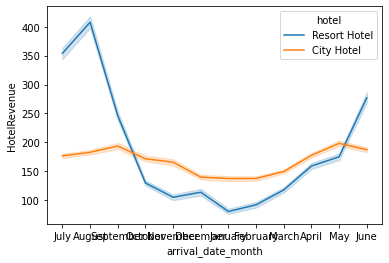

In [88]:
#Q1. Find total no. of guests on basis of adults,children and babies.

ADR_For_NonCanceledBooking = df_hotel[df_hotel['is_canceled'] !=1]  
ADR_For_NonCanceledBooking['Kids'] = ADR_For_NonCanceledBooking.children + ADR_For_NonCanceledBooking.babies
ADR_For_NonCanceledBooking['Total_Guests'] = ADR_For_NonCanceledBooking.Kids + ADR_For_NonCanceledBooking.adults

#Q2. Find ADR per person.
ADR_For_NonCanceledBooking['ADR_pp'] = (ADR_For_NonCanceledBooking.adr/ADR_For_NonCanceledBooking.Total_Guests)

#Q3. Find total no. of stay on basis of week nights and weekend nights.
ADR_For_NonCanceledBooking['TotalDays'] = ADR_For_NonCanceledBooking.stays_in_weekend_nights + ADR_For_NonCanceledBooking.stays_in_week_nights

#Q4. Find hotel revenue
ADR_For_NonCanceledBooking['HotelRevenue'] = (ADR_For_NonCanceledBooking.ADR_pp*ADR_For_NonCanceledBooking.TotalDays)

print (ADR_For_NonCanceledBooking)
sns.lineplot(data = ADR_For_NonCanceledBooking, x = 'arrival_date_month', y = 'HotelRevenue', hue = 'hotel')
plt.show()

# **Customer wise analysis**
*Q1. Find out count of customers on basis of customer type.

In [89]:
#Q1. Find out count of customers on basis of customer type.
customer=df_hotel["customer_type"].value_counts().reset_index()
customer.columns=["Customer_type","number_of_customers"]
customer

,Customer_type,number_of_customers
0,Transient,71986
1,Transient-Party,11727
2,Contract,3139
3,Group,544


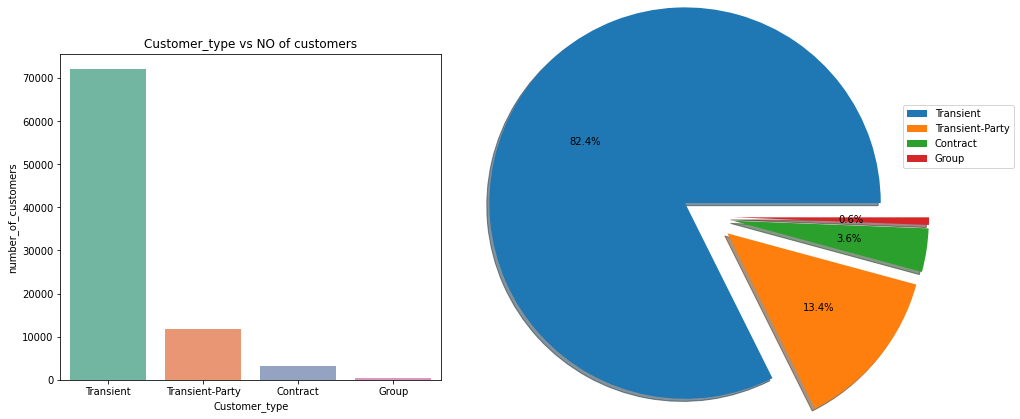

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x=customer["Customer_type"],y=customer["number_of_customers"],palette="Set2")
plt.title("Customer_type vs NO of customers")
plt.subplot(1,2,2)
plt.pie(df_hotel["customer_type"].value_counts(),autopct="%1.1f%%",shadow=True,radius=1.5,explode=[.2]*4)
plt.legend(labels=df_hotel["customer_type"].value_counts().index.tolist(),loc=(1.1,.65))
plt.show()

* **Here we can see the maximum number of customers are from transient category which is near about 75.1%.**

* **Resort hotel is getting more revenue in the month of August.**